Пункт А: Утверждение вида зависимости между x и y

Выберем нелинейную зависимость.
y= x² + 3x + 2

In [42]:
import numpy as np

def dependency(x):
    return x**2 + 3*x + 2


Пункт Б: Задание областей значений переменных x и y

x ∈ [−10,10]

y ∈ [0,150]

In [43]:
x_range = (-10, 10)
y_range = (0, 150)


Пункт В: Формулировка целевой функции

Целевая функция будет выглядеть следующим образом:

T(x,y) = a + b * fun(x**n) + c * fun(y**n)

Для простоты выберем fun(z) = z, n = 2, a = 1, b = 2, c = 3.

T(x,y) = 1 + 2x² + 3y²


In [44]:
def objective_function(x, y):
    return 1 + 2*x**2 + 3*y**2


Пункт Г: Задание постоянных параметров целевой функции

Целевая функция уже имеет глобальный минимум в точке(0,0) и локальные экстремумы в других точках.

Пункт Д: Выбор эволюционного алгоритма

In [45]:
from deap import base, creator, tools, algorithms
import random

# Удаляем предыдущее создание класса, если оно существует
if 'FitnessMin' in creator.__dict__:
    del creator.FitnessMin
if 'Individual' in creator.__dict__:
    del creator.Individual
# Создаем класс FitnessMin
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    x, y = individual
    return objective_function(x, y),

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


Пункт Е: Определение количества циклов и параметров алгоритма

Зададим количество поколений и размер популяции:

In [46]:
population_size = 50
num_generations = 100

population = toolbox.population(n=population_size)


Пункт Ж: Проверка работоспособности алгоритм

Проверим алгоритм на малых значениях:

In [47]:
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))


Пункт З: Графическое отображение процесса поиска

Реализуем визуализацию процесса поиска:



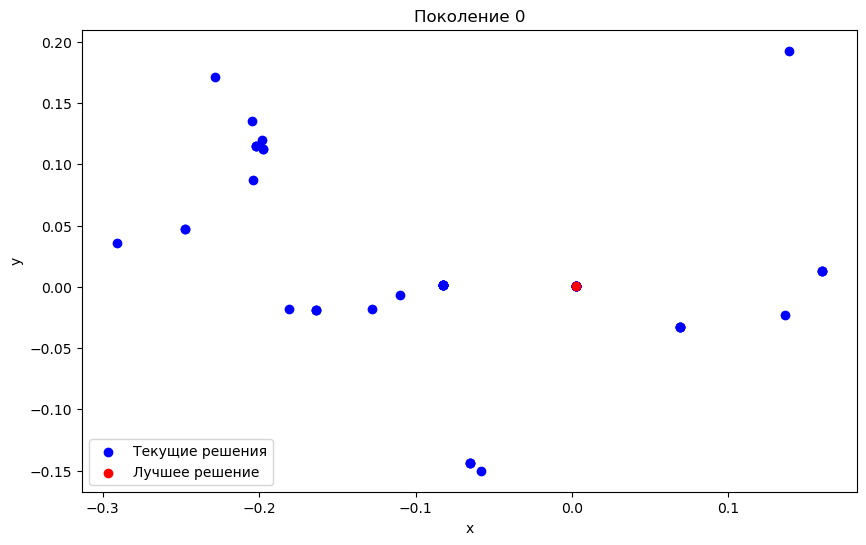

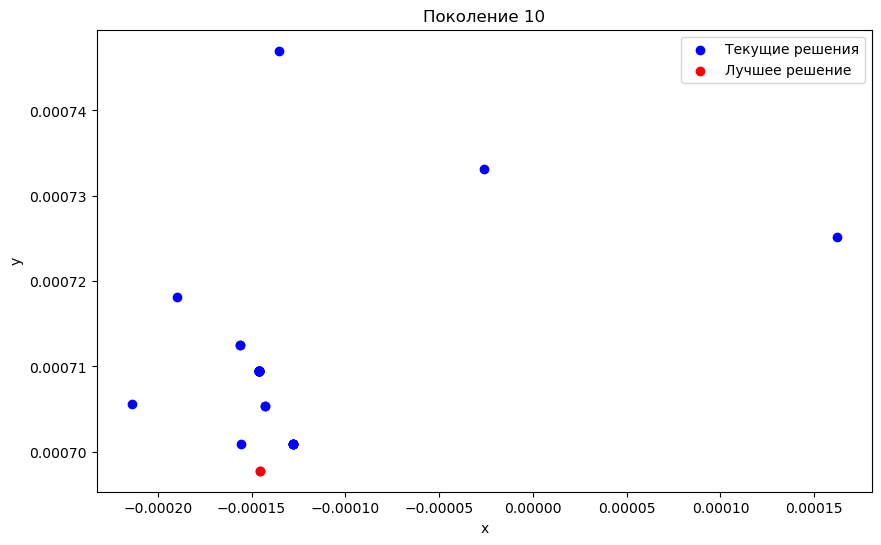

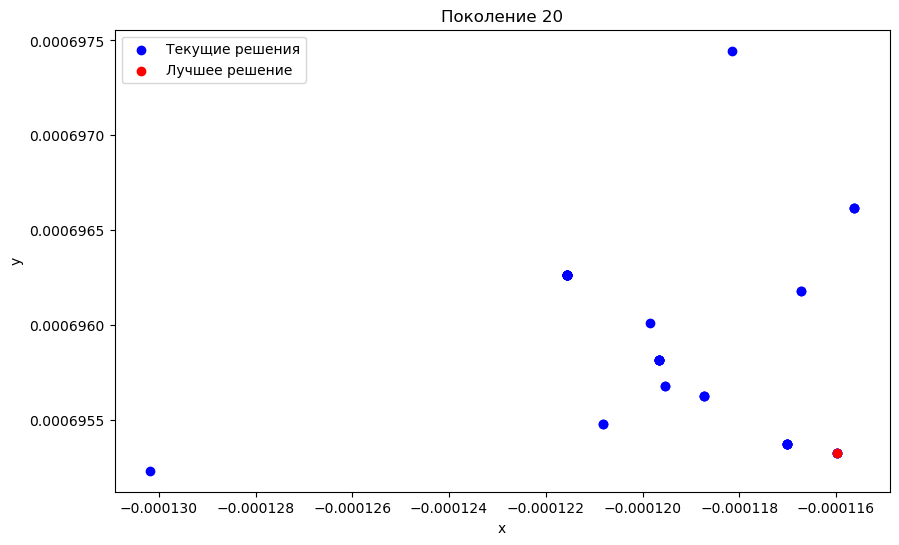

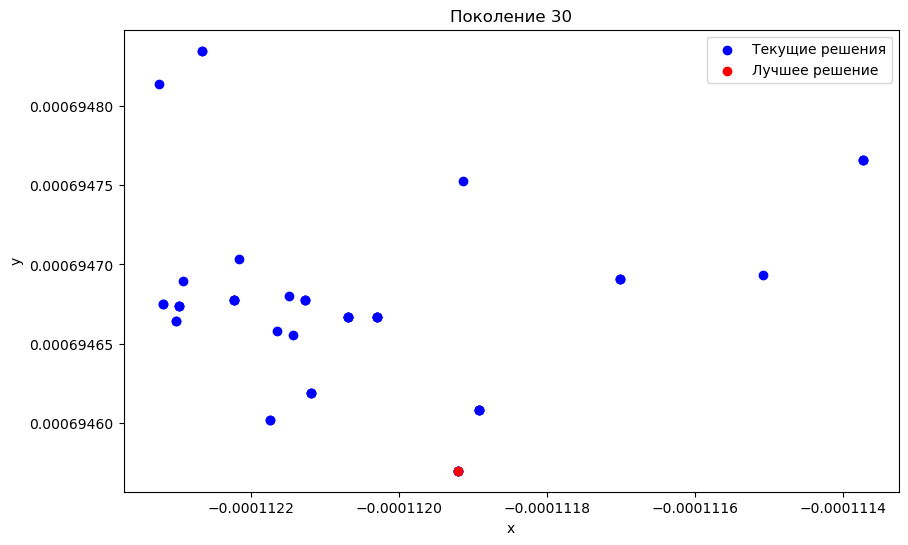

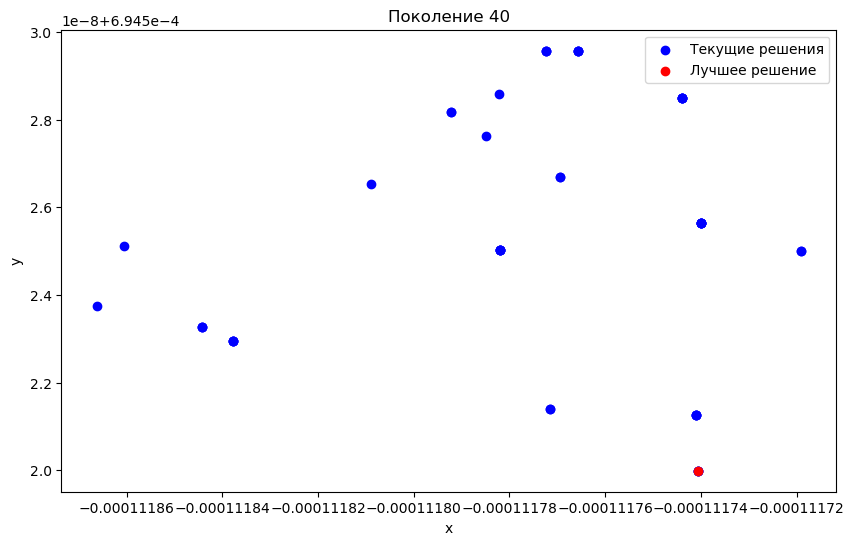

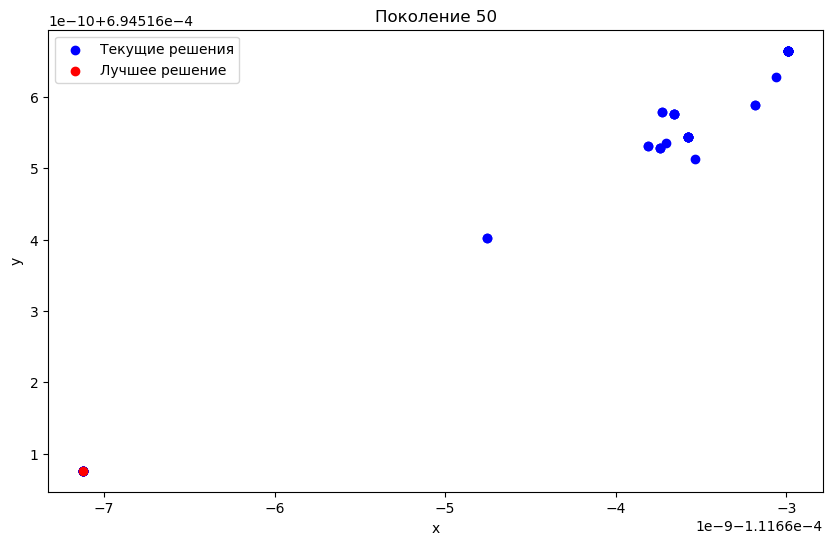

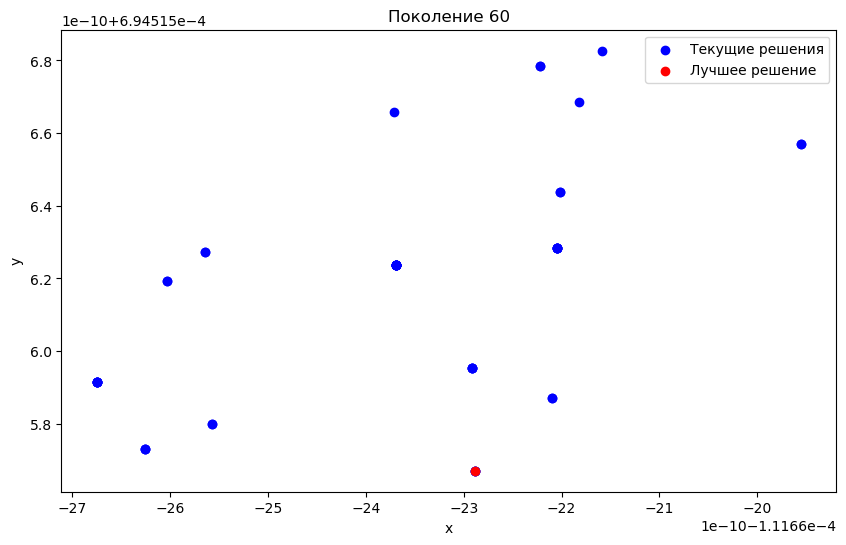

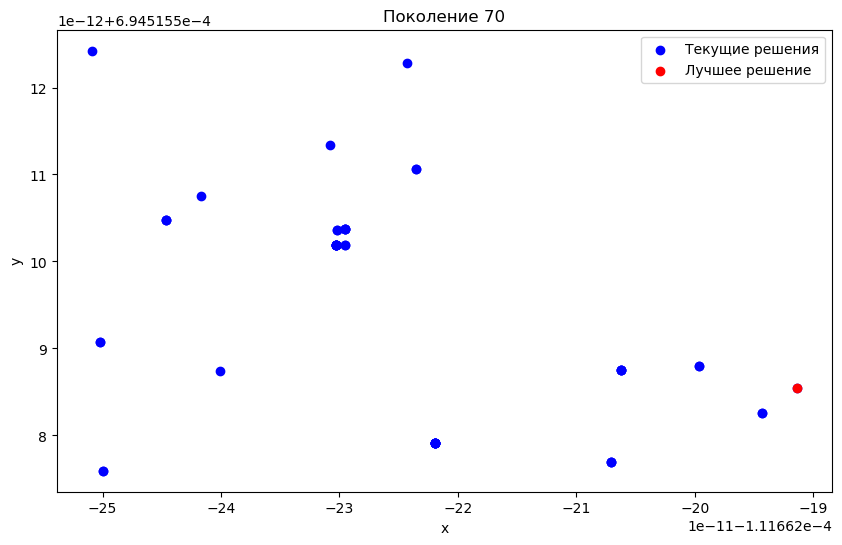

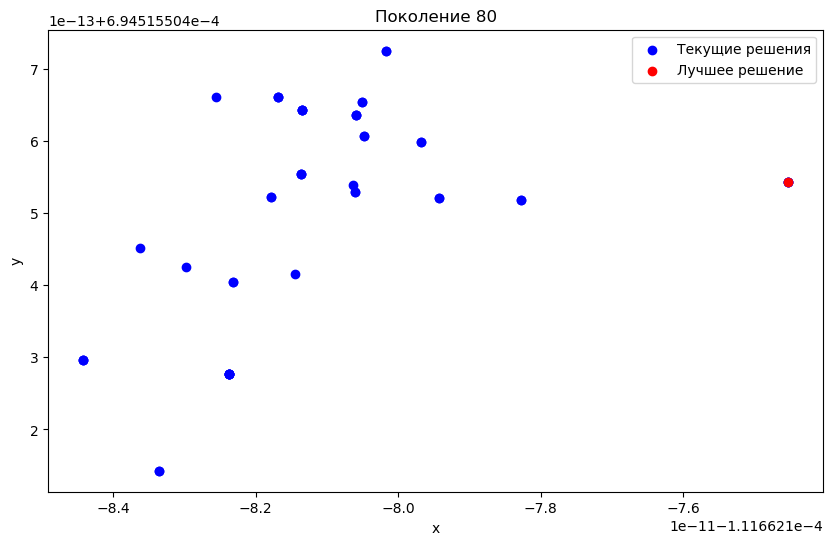

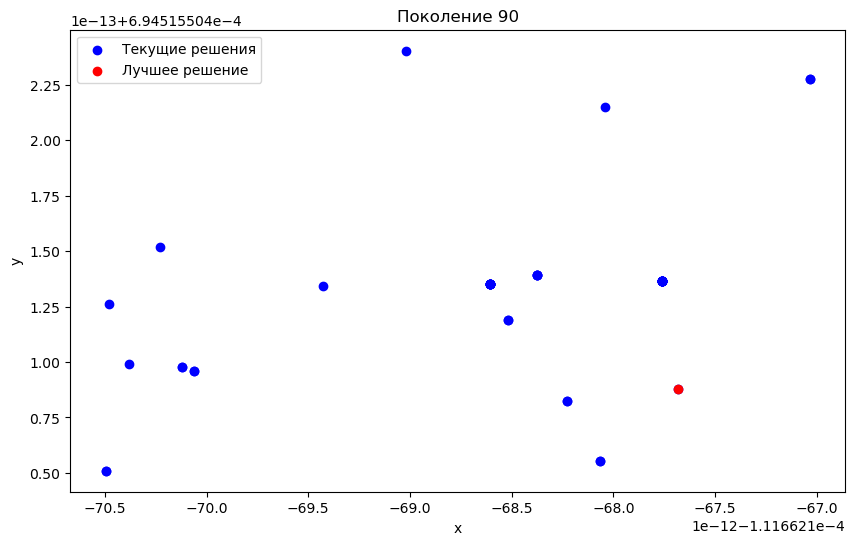

In [48]:
import matplotlib.pyplot as plt

def plot_search(population, generation):
    plt.figure(figsize=(10, 6))
    x = [ind[0] for ind in population]
    y = [ind[1] for ind in population]
    plt.scatter(x, y, c='blue', label='Текущие решения')
    best_ind = tools.selBest(population, k=1)[0]
    plt.scatter(best_ind[0], best_ind[1], c='red', label='Лучшее решение')
    plt.title(f'Поколение {generation}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    if gen % 10 == 0:
        plot_search(population, gen)


Пункт И: Оценка эффективности алгоритма

In [55]:
import time

start_time = time.time()
best_ind = tools.selBest(population, k=1)[0]
end_time = time.time()

# Преобразуем время в миллисекунды
execution_time_ms = (end_time - start_time) * 1000

print(f"Лучшее решение: {best_ind}")
print(f"Значение целевой функции: {objective_function(*best_ind)}")
print(f"Время выполнения: {execution_time_ms:.6f} миллисекунд")
print(f"Количество поколений: {num_generations}")


Лучшее решение: [-0.00011166216246800764, 0.0006945155040495053]
Значение целевой функции: 1.000001471992233
Время выполнения: 0.997066 миллисекунд
Количество поколений: 100
